## 1) การเตรียมคำสั่ง

#### คำสั่งในการดึง pandas มาใช้

pandas เป็น library หรือชุดคำสั่งสำเร็จรูปที่จะต้องมีการติดตั้งในครั้งแรกที่ต้องการใช้งาน ด้วยคำสั่ง pip install และต้องนำเข้ามาใช้ทุกครั้งที่ต้องการใช้งานด้วยคำสั่ง import

In [1]:
!pip install pandas

#### นำ pandas มาใช้

In [3]:
import pandas as pd

## 2) การเตรียมข้อมูล

#### ดึงข้อมูลจากไฟล์ Excel

ไฟล์ Excel จากไฟล์ East.xlsx

In [7]:
east_df = pd.read_excel('excel/East.xlsx',index_col=0)
east_df

,Qtr1,Qtr2,Qtr3,Qtr4
Product,,,,
Basil Leaf (Whole),9555,5975,5595,9659
Celery Seed (Whole),7543,7346,3466,7474
Catnip Leaf,854,364,474,743
Cardamom Seed (Ground),844,848,457,744
Anise Seeds,734,457,327,235
...,...,...,...,...
Caraway Seed (Whole),676,856,855,866
Bay Leaf (Whole),667,799,750,575
Chamomile Flowers,553,474,632,474


ไฟล์ Excel จากไฟล์ West.xlsx

In [8]:
west_df = pd.read_excel('excel/West.xlsx',index_col=0)
west_df

,Qtr1,Qtr2,Qtr3,Qtr4
Product,,,,
Basil Leaf (Whole),4884,6460,4761,7738
Celery Seed (Whole),4723,6375,6381,2321
Catnip Leaf,885,374,448,731
Anise Seeds,624,501,554,618
Asafoetida Powder,579,589,329,729
...,...,...,...,...
West Special,457,358,658,842
Cardamom Seed (Ground),401,687,629,602
Caraway Seed (Whole),379,629,418,236


## 3) การ Merge ข้อมูล

เป็นการรวมข้อมูลในวิธีการของ Database ที่นำ 2 ตารางมารวมกันโดยการเพิ่มเป็น Column ใหม่ โดยเราจะยึดตารางหลักเรียกว่า left และตารางรองเรียกว่า right ผ่านคำสั่ง .merge()

### 3.1) วิธีการ merge

การ merge จะแบ่งออกเป็น 4 วิธีหลัก คือ

    1) inner การเชื่อมข้อมูลโดยเลือกเฉพาะข้อมูลที่มีร่วมกัน (ดูจาก index)
    2) outer การเชื่อมข้อมูลโดยเลือกเก็บข้อมูลไว้ทั้งหมด
    3) left การเชื่อมข้อมูลโดยเลือกข้อมูลที่มีใน left เท่านั้น
    4) right การเชื่อมข้อมูลโดยเลือกข้อมูลที่มีใน right เท่านั้น

#### การใช้คำสั่ง .merge()

โดยเรียกใช้ข้อมูลตัวแรกเป็นข้อมูลหลัก (left) และใส่ข้อมูลในวงเล็บเป็นข้อมูลรอง (right), ใช้ parameter how= เพื่อใช้กำหนดวิธีการ merge เช่น outer, left_index=True ใช้กำหนดการเชื่อมข้อมูลโดยใช้ index ของ left, right_index=True กำหนดการเชื่อมข้อมูลด้ว index ของ right, และ suffixes= ใส่ข้อมูลที่จะใช้ใส่หลังชื่อ column เพื่อระบุที่มาของข้อมูล

In [15]:
east_df.merge(west_df,how='outer',left_index=True,right_index=True,suffixes=[' east',' west'])

,Qtr1 east,Qtr2 east,Qtr3 east,Qtr4 east,Qtr1 west,Qtr2 west,Qtr3 west,Qtr4 west
Product,,,,,,,,
Anise Seeds,734.0,457.0,327.0,235.0,624.0,501.0,554.0,618.0
Asafoetida Powder,688.0,468.0,874.0,568.0,579.0,589.0,329.0,729.0
Basil Leaf (Whole),9555.0,5975.0,5595.0,9659.0,4884.0,6460.0,4761.0,7738.0
Bay Leaf (Whole),667.0,799.0,750.0,575.0,296.0,594.0,501.0,646.0
Caraway Seed (Whole),676.0,856.0,855.0,866.0,379.0,629.0,418.0,236.0
...,...,...,...,...,...,...,...,...
Catnip Leaf,854.0,364.0,474.0,743.0,885.0,374.0,448.0,731.0
Celery Seed (Whole),7543.0,7346.0,3466.0,7474.0,4723.0,6375.0,6381.0,2321.0
Chamomile Flowers,553.0,474.0,632.0,474.0,489.0,641.0,594.0,626.0


## 4) การ Join ข้อมูล

เป็นการรวมข้อมูลในเชิง database เช่นเดียวกับ merge และมีผลลัพธ์การใช้งานคล้ายกัน แต่ .join() จะใช้ index เป็นหลักในการเชื่อมข้อมูล ในขณะที่ .merge() สามารเลือกทำงานกับ column อื่นๆ แทน index ได้

#### การใช้คำสั่ง .join()

สามารถใช้ lsuffix=, rsuffix= เพื่อกำหนดข้อความที่ใช้ต่อท้ายชื่อ column เพื่อระบุที่มาของข้อมูลได้

In [19]:
east_df.join(west_df,lsuffix=' east',rsuffix=' west')

,Qtr1 east,Qtr2 east,Qtr3 east,Qtr4 east,Qtr1 west,Qtr2 west,Qtr3 west,Qtr4 west
Product,,,,,,,,
Basil Leaf (Whole),9555,5975,5595,9659,4884.0,6460.0,4761.0,7738.0
Celery Seed (Whole),7543,7346,3466,7474,4723.0,6375.0,6381.0,2321.0
Catnip Leaf,854,364,474,743,885.0,374.0,448.0,731.0
Cardamom Seed (Ground),844,848,457,744,401.0,687.0,629.0,602.0
Anise Seeds,734,457,327,235,624.0,501.0,554.0,618.0
...,...,...,...,...,...,...,...,...
Caraway Seed (Whole),676,856,855,866,379.0,629.0,418.0,236.0
Bay Leaf (Whole),667,799,750,575,296.0,594.0,501.0,646.0
Chamomile Flowers,553,474,632,474,489.0,641.0,594.0,626.0


## 5) การ Concat ข้อมูล

เป็นคำสั่งในการเชื่อมข้อมูลที่ปรับแต่งได้มากที่สุด ไม่เหมือน .merge() และ .join() ที่เน้นแค่การเชื่อมข้อมูลเพิ่มข้อมูลเป็น Column ใหม่แต่ .concat() สามารถปรับ axis=1 เพื่อเลือกเพิ่มข้อมูลใน row ใหม่ได้ด้วย และยังรอบรับการสร้าง index หลาย layer หรือที่เรียกว่า multi index ที่ใช้จัดการข้อมูลที่ซับซ้อนขึ้น

#### การใช้ .concat() เชื่อม column ใหม่

สำหรับการเชื่อมข้อมูลด้วย .concat() เราจะไม่ใช่ suffix ในการระบุแหล่งที่มาข้อมูล แต่จะใช้การเก็บข้อมูลใน multi index แทน ที่จะกำหนดชื่อผ่าน parameter keys=

In [27]:
pd.concat([east_df,west_df],keys=['east','west'],axis=1)

east                            west          \
                          Qtr1    Qtr2    Qtr3    Qtr4    Qtr1    Qtr2   
Product                                                                  
Basil Leaf (Whole)      9555.0  5975.0  5595.0  9659.0  4884.0  6460.0   
Celery Seed (Whole)     7543.0  7346.0  3466.0  7474.0  4723.0  6375.0   
Catnip Leaf              854.0   364.0   474.0   743.0   885.0   374.0   
Cardamom Seed (Ground)   844.0   848.0   457.0   744.0   401.0   687.0   
Anise Seeds              734.0   457.0   327.0   235.0   624.0   501.0   
Asafoetida Powder        688.0   468.0   874.0   568.0   579.0   589.0   
Caraway Seed (Whole)     676.0   856.0   855.0   866.0   379.0   629.0   
Bay Leaf (Whole)         667.0   799.0   750.0   575.0   296.0   594.0   
Chamomile Flowers        553.0   474.0   632.0   474.0   489.0   641.0   
East Special             400.0   751.0   985.0  1450.0     NaN     NaN   
Cardamom Seed (Whole)    379.0   375.0   377.0   745.0   286.0   566.0   
West Special               NaN     NaN     NaN     NaN   457.0   358.0   

                                        
                          Qtr3    Qtr4  
Product                                 
Basil Leaf (Whole)      4761.0  7738.0  
Celery Seed (Whole)     6381.0  2321.0  
Catnip Leaf              448.0   731.0  
Cardamom Seed (Ground)   629.0   602.0  
Anise Seeds              554.0   618.0  
Asafoetida Powder        329.0   729.0  
Caraway Seed (Whole)     418.0   236.0  
Bay Leaf (Whole)         501.0   646.0  
Chamomile Flowers        594.0   626.0  
East Special               NaN     NaN  
Cardamom Seed (Whole)    236.0   618.0  
West Special             658.0   842.0

#### การใช้ .concat() เชื่อม row ใหม่

In [22]:
pd.concat([east_df,west_df],keys=['east','west'])

Qtr1  Qtr2  Qtr3  Qtr4
     Product                                       
east Basil Leaf (Whole)      9555  5975  5595  9659
     Celery Seed (Whole)     7543  7346  3466  7474
     Catnip Leaf              854   364   474   743
     Cardamom Seed (Ground)   844   848   457   744
     Anise Seeds              734   457   327   235
     Asafoetida Powder        688   468   874   568
     Caraway Seed (Whole)     676   856   855   866
     Bay Leaf (Whole)         667   799   750   575
     Chamomile Flowers        553   474   632   474
     East Special             400   751   985  1450
     Cardamom Seed (Whole)    379   375   377   745
west Basil Leaf (Whole)      4884  6460  4761  7738
     Celery Seed (Whole)     4723  6375  6381  2321
     Catnip Leaf              885   374   448   731
     Anise Seeds              624   501   554   618
     Asafoetida Powder        579   589   329   729
     Chamomile Flowers        489   641   594   626
     West Special             457   358   658   842
     Cardamom Seed (Ground)   401   687   629   602
     Caraway Seed (Whole)     379   629   418   236
     Bay Leaf (Whole)         296   594   501   646
     Cardamom Seed (Whole)    286   566   236   618

## 6) การ append

เป็นการเชื่อมข้อมูลอย่างง่ายที่นำข้อมูลมาเชื่อมกันแบบ outer โดยเน้นไปที่การเชื่อมโดยการเพิ่ม row ใหม่ ที่เน้นทำแค่กรณีนี้กรณีเดียวเท่านั้น โดยการเชื่อมด้วย append เกิดขึ้นได้เป็นปกติในกระบวนการเพิ่มข้อมูลใหม่เข้าไปในตารางเดิมทำให้คำสั่งนี้เกิดขึ้นเพื่อความสะดวกสบาย ไม่ต้องใช้ .concat() และตั้งค่าอีกที

#### การใช้คำสั่ง .append()

In [16]:
east_df.append(west_df)

,Qtr1,Qtr2,Qtr3,Qtr4
Product,,,,
Basil Leaf (Whole),9555,5975,5595,9659
Celery Seed (Whole),7543,7346,3466,7474
Catnip Leaf,854,364,474,743
Cardamom Seed (Ground),844,848,457,744
Anise Seeds,734,457,327,235
...,...,...,...,...
West Special,457,358,658,842
Cardamom Seed (Ground),401,687,629,602
Caraway Seed (Whole),379,629,418,236


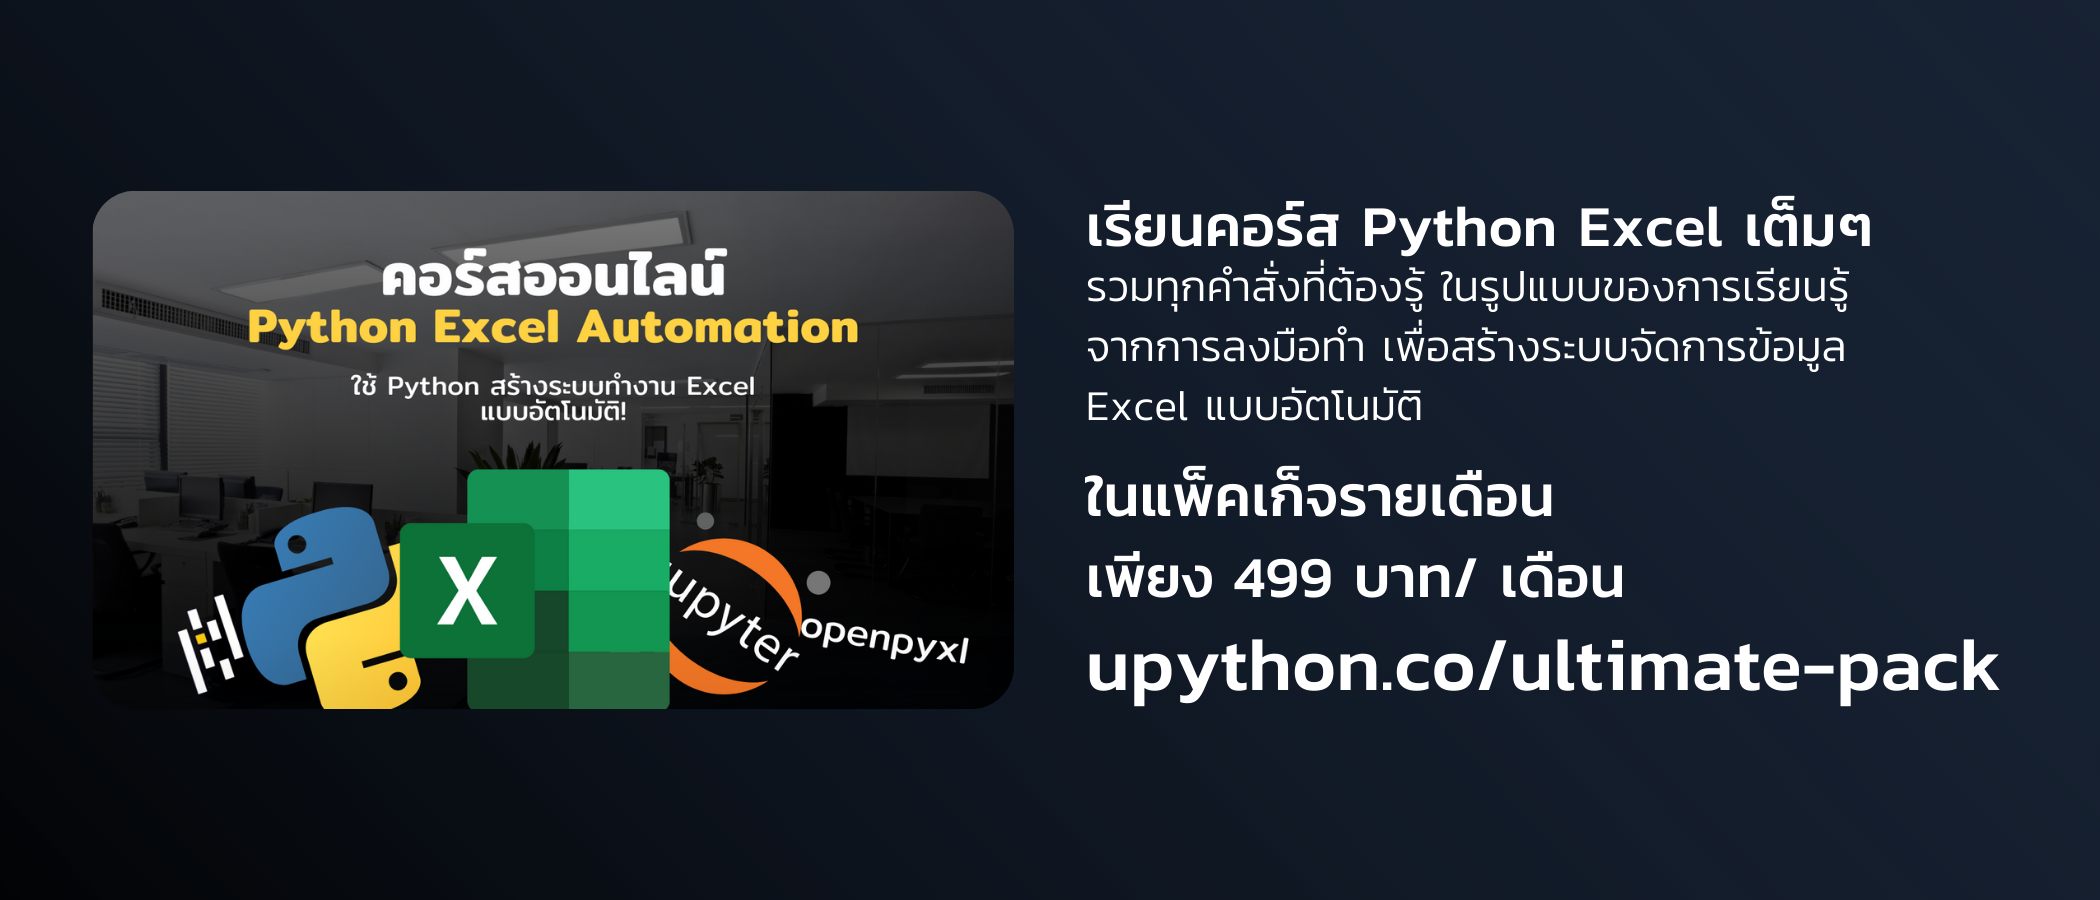

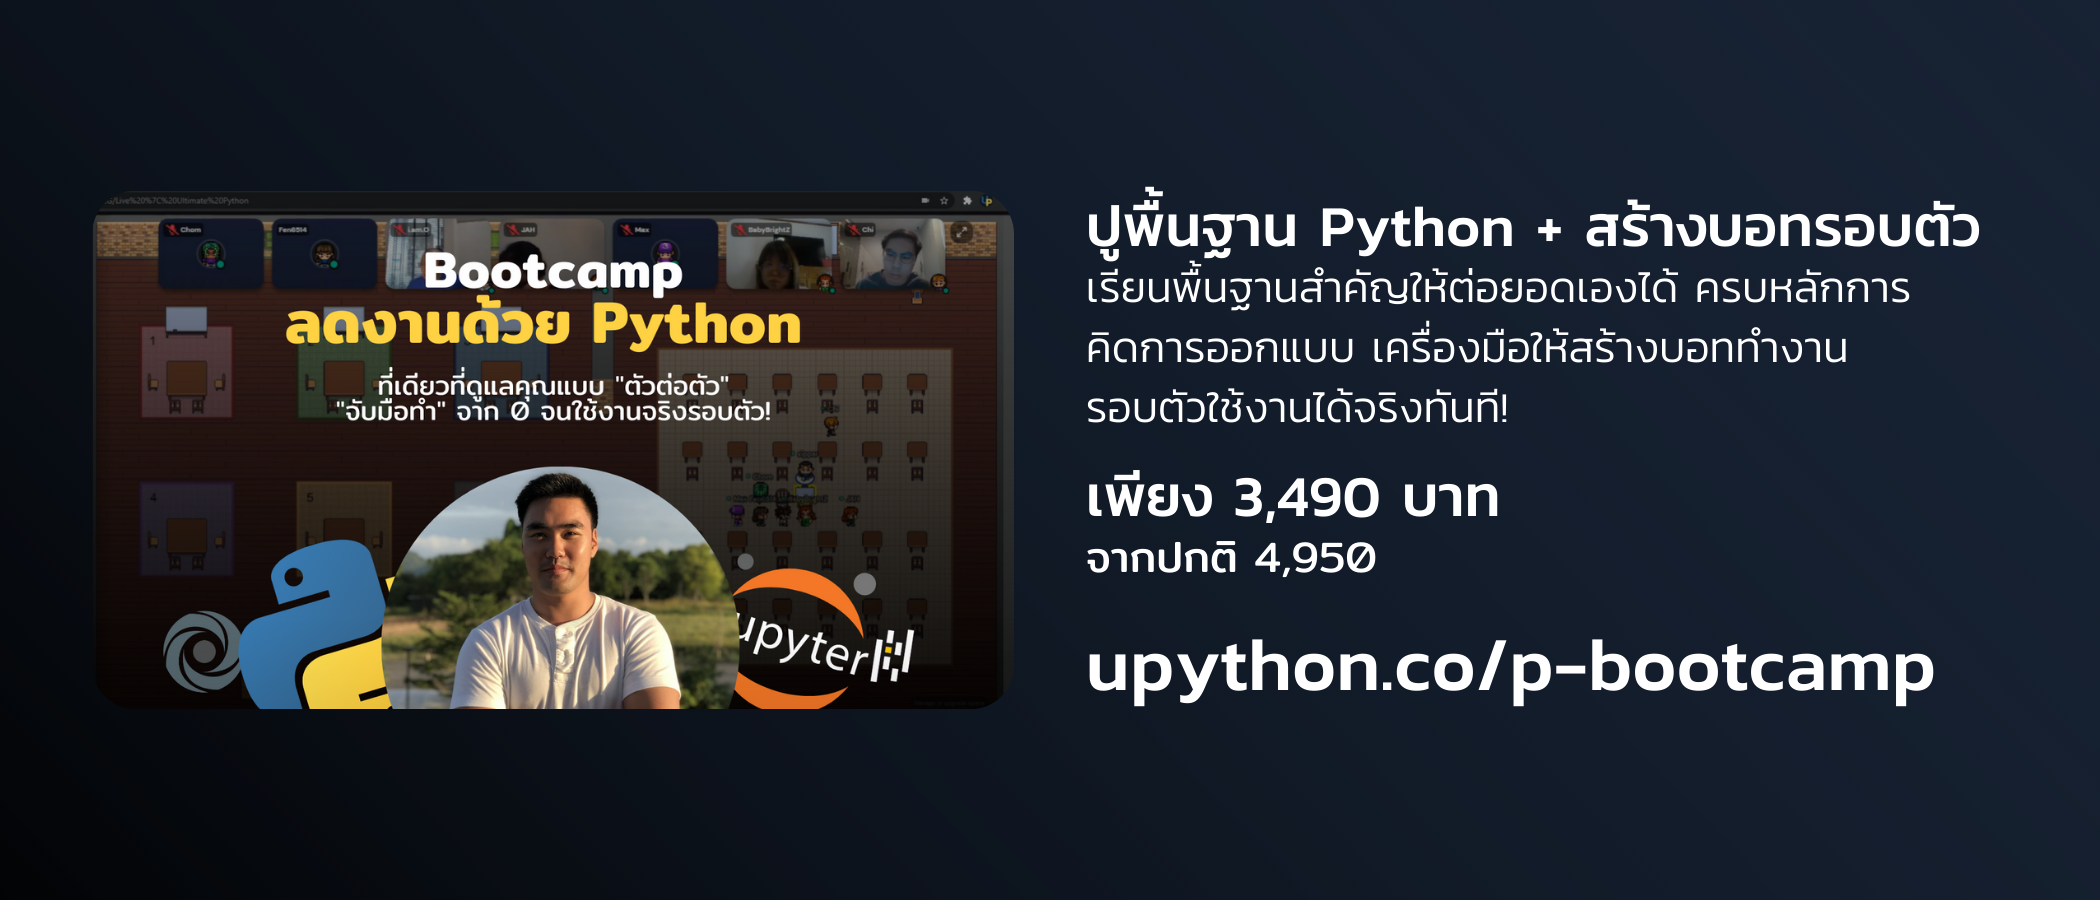